In [46]:
#import the necessary libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import requests
import re

In [47]:
#check the ssl certificate????

In [48]:
#read html from the url
guten_url = 'https://www.gutenberg.org/browse/scores/top'

In [49]:
#get pulls the response
response = requests.get(guten_url)

In [50]:
type(response)

requests.models.Response

In [51]:
##write a small function to check the satus of the web request
def status_check(r):
    if r.status_code==200:
        print("success!!")
        return 1
    else:
        print("failed!")
        return -1

In [52]:
#run the function
status_check(response)

success!!


1

In [53]:
#function to find out the encoding type
def encoding_check(r):
    return(r.encoding)

In [54]:
#run function
encoding_check(response)

'UTF-8'

In [55]:
#decode the response and pass this on to beaufitulsoup for html parsing
def decode_content(r,encoding):
    return (r.content.decode(encoding))
contents = decode_content(response,encoding_check(response))

In [56]:
#type of the decoded object
type(contents)

str

In [57]:
#length
len(contents)

58100

In [58]:
#html passed for parsing
soup = BeautifulSoup(contents, 'html.parser')

In [59]:
txt_dump = soup.text

In [60]:
#type of the text dump
type(txt_dump)

str

In [61]:
#smaller length after parsing
len(txt_dump)

25855

In [62]:
print(txt_dump[10000:11000])

e — Volume 1 by Richard Wagner (13842)
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (13078)
Pride and Prejudice by Jane Austen (12967)
Noli Me Tangere by José Rizal (7733)
Alice's Adventures in Wonderland by Lewis Carroll (7075)
Ang "Filibusterismo" (Karugtóng ng Noli Me Tangere) by José Rizal (6957)
The Great Gatsby by F. Scott  Fitzgerald (6910)
The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde (5695)
The Picture of Dorian Gray by Oscar Wilde (5604)
A Tale of Two Cities by Charles Dickens (5072)
Dracula by Bram Stoker (4994)
The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson (4892)
A Doll's House : a play by Henrik Ibsen (4610)
Metamorphosis by Franz Kafka (4015)
Great Expectations by Charles Dickens (3798)
The slang dictionary : by John Camden Hotten (3762)
The Reign of Greed by José Rizal (3413)
A Modest Proposal by Jonathan Swift (3322)
The Adventures of Sherlock Holmes by Arthur Conan Doyle (3270)
The 

In [63]:
#find all the href tags and store them in the list of links. 
text_list = []
for d in soup.find_all('a'):
    text_list.append(d.get('href'))

In [64]:
#check what the list looks like-print the first 30 elements
text_list[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [217]:
#use the regular expression to find the numeric digits in these links. 

#initialize the empty list to hold the file numbers over an appropirate rnage and use regex
# to find the numeric digits in the link href string. use the finall method

num_dig = []
for i in range(18,118):
    list = text_list[i]
    list = list.strip()
    h = re.findall('[0-9]+',list)
    if len(h)==1:
        num_dig.append(int(h[0]))
        
#these are the file numbers for the top 100 ebooks
print("top 100 books:", num_dig)

top 100 books: [1, 1, 7, 7, 30, 30, 1513, 2701, 2641, 145, 37106, 100, 16389, 67979, 84, 1342, 394, 6761, 2160, 4085, 6593, 1259, 5197, 64317, 11, 20228, 47629, 844, 98, 174, 345, 2542, 43, 70783, 1400, 42108, 2600, 5200, 55, 1080, 70781, 1661, 35899, 70782, 70784, 2554, 76, 1184, 10676, 28054, 25344, 1952, 2591, 15845, 6130, 1260, 4300, 70785, 768, 120, 46, 996, 70777, 4363, 27827, 74, 1232, 2680, 1727, 45, 36, 5740, 30254, 16, 58585, 3206, 13806, 205, 408, 70780, 1399, 1998, 23042, 158, 236, 33283, 2500, 779, 2852, 8800, 135]


In [218]:
#what does the soup object's text look like. use the .text method and print only the first 2000 characters
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2023-05-17240261
last 7 days1582660
last 30 days7600516



Top 100 EBooks yesterday
T

In [219]:
#search in the extracted text from the soup object to find the names of the top 100 ebooks
names = []


In [220]:
#create a starting index. it should point at the text top 100 ebooks yesterday. 
#use the splitlines method of soup.text. 
start_index = soup.text.splitlines().index('Top 100 EBooks yesterday')

In [222]:
for i in range(18,118):
    names.append(soup.text.splitlines()[start_index+2+i])

In [223]:
#use a regular expression to extract only text from the name string adn append it to an empty list
#use match and span to find the indices and use them

strings = []
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',names[i]).span()
    strings.append(names[i][id1:id2])

In [224]:
for l in strings:
    print(l)


The Expedition of Humphry Clinker by T
The Adventures of Roderick Random by T
History of Tom Jones
Twenty Years After by Alexandre Dumas 
My Life 
The Great Gatsby by F
Alice
Noli Me Tangere by Jos
Ang 
The Importance of Being Earnest
A Tale of Two Cities by Charles Dickens 
The Picture of Dorian Gray by Oscar Wilde 
Dracula by Bram Stoker 
A Doll
The Strange Case of Dr
Uncle Wiggily
Great Expectations by Charles Dickens 
The slang dictionary 
War and Peace by graf Leo Tolstoy 
Metamorphosis by Franz Kafka 
The Wonderful Wizard of Oz by L
A Modest Proposal by Jonathan Swift 
The saddle boys on the plains 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The Philippines a Century Hence by Jos
The United States Marine Corps in the World War by Edwin N
Money and trade considered 
Crime and Punishment by Fyodor Dostoyevsky 
Adventures of Huckleberry Finn by Mark Twain 
The Count of Monte Cristo
The Reign of Greed by Jos
The Brothers Karamazov by Fyodor Dostoyevsky 
The Scarlet Lett

In [280]:
#import urllib.request, urllib.parse, urllib.error, and json
import urllib.request
import urllib.parse
import urllib.error
import json

In [281]:
#load the secret API key from a jSON file stored in the same folder in a variable, by using json.loads
with open('APIkeys.json') as f:
    keys = json.load(f)
    apikey = keys['secretapikey']

In [282]:
#assign the OMDB portal as a string to a variable
serviceurl = 'http://www.omdbapi.com/?'

In [283]:

#create a variable called apikey with the last portion of the URL, where secretapikey is your own API key

secretapikey = '&apikey='+apikey


In [284]:
#write a utliity function called print_json to print the mov edata from a json file
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [285]:
#write a utility function to download a poster of the movie based on the information from the JSON dataset


def save_poster(json_data):
    #use the os module
    import os
    title = json_data['Title']
    #the poster data is stored in the JSON key Poster
    poster_url = json_data['Poster']
    #use the python commen to open a file and write the poster data
    poster_file_extension=poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    #this function will save the poster data as an image file
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    #close the file after you're done
    f.close()

In [286]:
#write a utility function called search_movie to search for movie by it's name


def search_movie(title):
    #use a try-except loop for this
    try:
        #use the previously created serviceurl and apikey variables
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+secretapikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        #this URL will be used to access the data
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        # the JSON data has a key called Response
        #if it's true, that means it's successful
        if json_data['Response']=='True':
            print_json(json_data)
            #check this before processing the data
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            # if not successful, print the JSON key Error
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [287]:
#test the search_movie function by entering titanic
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=da8f43c1
ERROR: Unauthorized


In [288]:
#test the search_movie function by entering "Random_error"
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=da8f43c1
Error encountered:  Movie not found!


In [293]:
# Connect to an API of your choice and do a simple data pull
#using get to pull API
response = requests.get("https://official-joke-api.appspot.com/random_joke")
print(response.status_code)

200


In [294]:
#add API to variable
data = response.text

In [297]:
#load API from variable
#this is a jokes API
json.loads(data)

{'type': 'programming',
 'setup': 'How do you check if a webpage is HTML5?',
 'punchline': 'Try it out on Internet Explorer',
 'id': 56}

In [301]:
#choose a dataset
df = pd.read_csv("test_data9.csv")

In [302]:
#use Matplotlib
import matplotlib.pyplot as plt

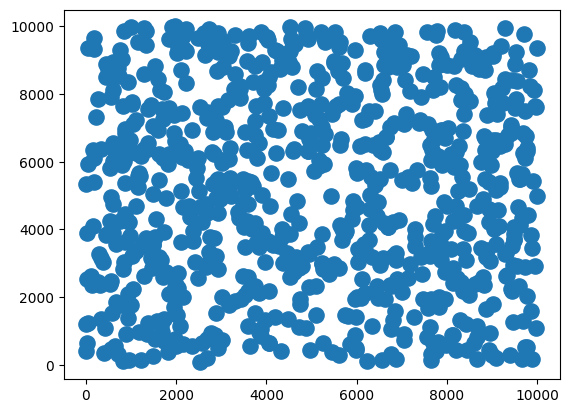

In [309]:
#scatterplot
plt.scatter(df.SomeInt, df.SomeReal, s=120)

<AxesSubplot: ylabel='ParentId'>

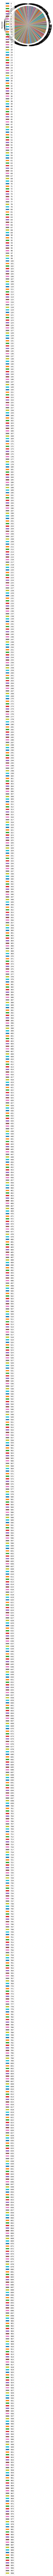

In [323]:
#pie chart
#data used doesn't have any numerical duplicates so pie chart looks a little crazy
df.plot.pie(y = "ParentId", figsize=(5, 5))

<AxesSubplot: xlabel='SomeLat'>

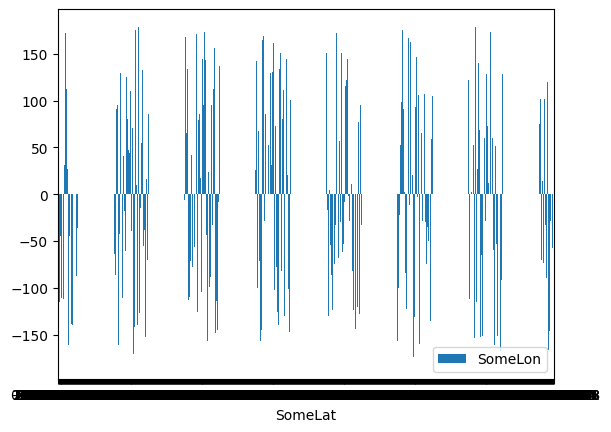

In [325]:
#bar graph
df.plot.bar(x='SomeLat', y='SomeLon', rot=0)